# **Topic: Age Detection From Image**

# **Summary:**
<h1>The provided code implements age detection from images using transfer learning with the InceptionResNetV2 model. It trains a deep learning model on a dataset of facial images labeled with age categories. The model is trained to predict the age category of a person such as (young middle and old) depicted in an input image. After training, the script evaluates the model's performance on a validation dataset and saves the trained model for future use. It also includes code for loading the saved model and making predictions on new images to infer the age of individuals depicted in those images.

# **Importing the required libraries.**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# **Loading the zip file of provided Images data and extracting that data**

In [ ]:
# import zipfile
# import os

# # Define the path to your zip file
# zip_file_path = '/content/drive/MyDrive/age detect.zip'

# # Define the directory to extract the zip file
# extract_dir = '/content/drive/MyDrive/age detect'

# # Create the extraction directory if it doesn't exist
# os.makedirs(extract_dir, exist_ok=True)

# # Extract the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# **The provided csv file with the ID and Classes**

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/age detect/faces/train.csv')
data

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
...,...,...
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE


In [ ]:
data.Class.unique()

array(['MIDDLE', 'YOUNG', 'OLD'], dtype=object)

# **this script helps structure image data by segregating it into directories based on class labels, which is often a necessary preprocessing**

In [ ]:
# import os
# import shutil
# from tqdm import tqdm

# images_dir = '/content/drive/MyDrive/age detect/faces/Train'

# for index, row in tqdm(data.iterrows(), total=len(data), desc="Copying files"):
#     file_name = row['ID']
#     file_class = row['Class']

#     dest_dir = '/content/drive/MyDrive/dataset/' + file_class
#     os.makedirs(dest_dir, exist_ok=True)

#     source_path = os.path.join(images_dir, file_name)
#     destination_path = os.path.join(dest_dir, file_name)

#     shutil.copyfile(source_path, destination_path)

Copying files: 100%|██████████| 19906/19906 [1:59:18<00:00,  2.78it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Spliting the data for Training**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory as ImageDataset

train = ImageDataset(
    directory=r'/content/drive/MyDrive/dataset',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(299, 299),
    validation_split=0.25,
    subset='training',
    seed=42
)

Found 19906 files belonging to 3 classes.
Using 14930 files for training.


# **Spliting the data for validation**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory as ImageDataset

# Use the 'validation' subset for validation data
validation_dataset = ImageDataset(
    directory=r'/content/drive/MyDrive/dataset/',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(299, 299),
    validation_split=0.25,
    subset='validation',
    seed=42
)

Found 19906 files belonging to 3 classes.
Using 4976 files for validation.


In [ ]:
# # Optionally, you can shuffle the datasets
# validation_dataset = validation_dataset.shuffle(buffer_size=validation_size, seed=42)
# test_dataset = test_dataset.shuffle(buffer_size=len(train) - validation_size, seed=42)

In [ ]:
# # Multiply by batch size
# train_size *= 64
# validation_size *= 64  # Assuming the batch size for validation is now 64


# # Print sizes
# print("Train dataset size:", train_size)
# print("Validation dataset size:", validation_size)
# # print("Test dataset size:", test_size)


# **Transfer Learning with InceptionResNetV2 for Image Classification in TensorFlow**

In [ ]:
# Load InceptionResNetV2 model
inception = InceptionResNetV2(include_top=False, weights='imagenet')
inception.trainable = False

**Creating a Custom Model with InceptionResNetV2 for Image Classification**

In [ ]:
import keras
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess

inception = InceptionResNetV2(include_top=False,
                      weights='imagenet')

inception.trainable = False

inputs = keras.Input(shape=(299, 299, 3))

x = preprocess(inputs)
x = inception(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

219055592/219055592 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 299, 299, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 299, 299, 3)       0         
 da)                                                             
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 global_average_pooling2d (  (None, 1536)              0    

**Compiling the InceptionResNetV2 Model for Image Classification**

In [ ]:
# Create and compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

**Defining Early Stopping Callback for Model Training**

In [ ]:
# Define early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess

# Use the 'training' subset for training data
train_dataset = ImageDataset(
    directory=r'/content/drive/MyDrive/dataset/',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(299, 299),
    validation_split=0.25,
    subset='training',    # Use 'training' subset for training data
    seed=42
)

# Use the 'validation' subset for validation data
validation_dataset = ImageDataset(
    directory=r'/content/drive/MyDrive/dataset/',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(299, 299),
    validation_split=0.25,
    subset='validation',    # Use 'validation' subset for validation data
    seed=42
)

# Load InceptionResNetV2 model
inception = InceptionResNetV2(include_top=False, weights='imagenet')
inception.trainable = False

# Define model architecture
inputs = keras.Input(shape=(299, 299, 3))
x = preprocess(inputs)
x = inception(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation='softmax')(x)

# Create and compile the model
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

# Define early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

# # Train the model
# history = model.fit(train_dataset,
#                     epochs=16,
#                     validation_data=validation_dataset,
#                     callbacks=[callback])


Found 19906 files belonging to 3 classes.
Using 14930 files for training.
Found 19906 files belonging to 3 classes.
Using 4976 files for validation.
219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
# Train the model
history = model.fit(train_dataset,
                    epochs=16,
                    validation_data=validation_dataset,
                    callbacks=[callback])


Epoch 1/16
234/234 [==============================] - 2388s 10s/step - loss: 0.7778 - categorical_accuracy: 0.6599 - val_loss: 0.7363 - val_categorical_accuracy: 0.6897
Epoch 2/16
234/234 [==============================] - 212s 902ms/step - loss: 0.7192 - categorical_accuracy: 0.6874 - val_loss: 0.7187 - val_categorical_accuracy: 0.6831
Epoch 3/16
234/234 [==============================] - 241s 1s/step - loss: 0.6949 - categorical_accuracy: 0.7000 - val_loss: 0.7079 - val_categorical_accuracy: 0.7008
Epoch 4/16
234/234 [==============================] - 214s 908ms/step - loss: 0.6843 - categorical_accuracy: 0.7046 - val_loss: 0.7023 - val_categorical_accuracy: 0.6941
Epoch 5/16
234/234 [==============================] - 213s 902ms/step - loss: 0.6708 - categorical_accuracy: 0.7116 - val_loss: 0.6956 - val_categorical_accuracy: 0.7014
Epoch 6/16
234/234 [==============================] - 212s 902ms/step - loss: 0.6621 - categorical_accuracy: 0.7155 - val_loss: 0.6911 - val_categorical_a

In [ ]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_dataset)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

78/78 [==============================] - 55s 683ms/step - loss: 0.6589 - categorical_accuracy: 0.7176
Validation Loss: 0.6588848233222961
Validation Accuracy: 0.7176446914672852


In [ ]:
# Save the trained model
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model("my_model.h5")


**Predictions on test images**

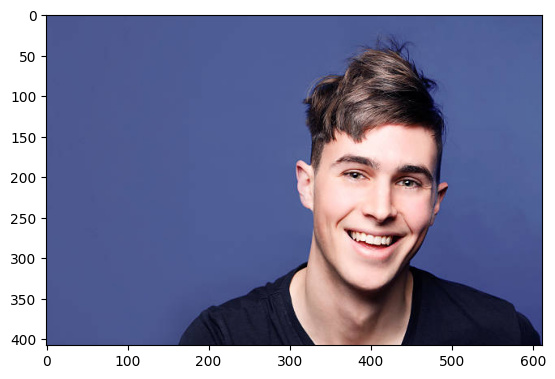

1/1 [==============================] - 5s 5s/step
Class labels: ['MIDDLE', 'OLD', 'YOUNG']
Predictions:
MIDDLE: 0.259786
OLD: 0.131060
YOUNG: 0.609154
Final prediction: YOUNG with probability: 0.609154


In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

def decode_predictions(predictions, class_labels):
    probabilities = {class_label: prediction for prediction, class_label in zip(predictions[0], class_labels)}
    print("Predictions:")
    for class_label, probability in probabilities.items():
        print(f"{class_label}: {probability:.6f}")

    highest_prediction = max(probabilities, key=probabilities.get)
    highest_probability = probabilities[highest_prediction]
    print(f"Final prediction: {highest_prediction} with probability: {highest_probability:.6f}")

# Load the test image
test_img = cv2.imread('/content/drive/MyDrive/age detect/age.jpg')

# Display the original image
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

# Resize the image to 299x299
test_img_resized = cv2.resize(test_img, (299, 299))

# Reshape the resized image to match the model's input shape
test_input = test_img_resized.reshape((1, 299, 299, 3))

# Convert the resized image to TensorFlow tensor
test_input_tensor = tf.convert_to_tensor(test_input, dtype=tf.float32)

# Generate predictions using the model
output = model.predict(test_input_tensor)

# Get the class labels from the directory structure
class_labels = sorted(os.listdir('/content/drive/MyDrive/dataset/'))

# Print the class labels
print("Class labels:", class_labels)

# Decode predictions
decode_predictions(output, class_labels)


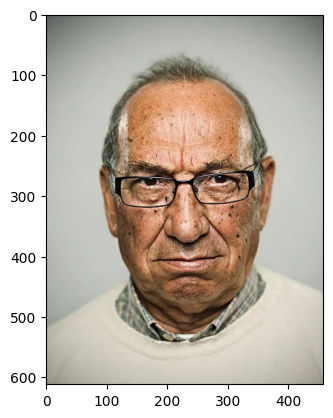

1/1 [==============================] - 3s 3s/step
Class labels: ['MIDDLE', 'OLD', 'YOUNG']
Predictions:
MIDDLE: 0.219350
OLD: 0.706584
YOUNG: 0.074066
Final prediction: OLD with probability: 0.706584


In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

def decode_predictions(predictions, class_labels):
    probabilities = {class_label: prediction for prediction, class_label in zip(predictions[0], class_labels)}
    print("Predictions:")
    for class_label, probability in probabilities.items():
        print(f"{class_label}: {probability:.6f}")

    highest_prediction = max(probabilities, key=probabilities.get)
    highest_probability = probabilities[highest_prediction]
    print(f"Final prediction: {highest_prediction} with probability: {highest_probability:.6f}")

# Load the test image
test_img = cv2.imread('/content/drive/MyDrive/age detect/real-man.webp')

# Display the original image
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

# Resize the image to 299x299
test_img_resized = cv2.resize(test_img, (299, 299))

# Reshape the resized image to match the model's input shape
test_input = test_img_resized.reshape((1, 299, 299, 3))

# Convert the resized image to TensorFlow tensor
test_input_tensor = tf.convert_to_tensor(test_input, dtype=tf.float32)

# Generate predictions using the model
output = model.predict(test_input_tensor)

# Get the class labels from the directory structure
class_labels = sorted(os.listdir('/content/drive/MyDrive/dataset/'))

# Print the class labels
print("Class labels:", class_labels)

# Decode predictions
decode_predictions(output, class_labels)


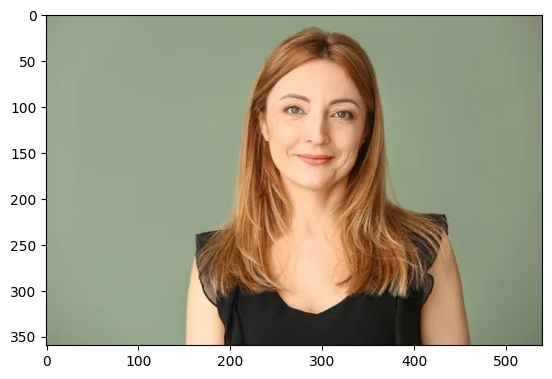

1/1 [==============================] - 0s 37ms/step
Class labels: ['MIDDLE', 'OLD', 'YOUNG']
Predictions:
MIDDLE: 0.565725
OLD: 0.137636
YOUNG: 0.296639
Final prediction: MIDDLE with probability: 0.565725


In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

def decode_predictions(predictions, class_labels):
    probabilities = {class_label: prediction for prediction, class_label in zip(predictions[0], class_labels)}
    print("Predictions:")
    for class_label, probability in probabilities.items():
        print(f"{class_label}: {probability:.6f}")

    highest_prediction = max(probabilities, key=probabilities.get)
    highest_probability = probabilities[highest_prediction]
    print(f"Final prediction: {highest_prediction} with probability: {highest_probability:.6f}")

# Load the test image
test_img = cv2.imread('/content/drive/MyDrive/age detect/middleage.webp')

# Display the original image
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

# Resize the image to 299x299
test_img_resized = cv2.resize(test_img, (299, 299))

# Reshape the resized image to match the model's input shape
test_input = test_img_resized.reshape((1, 299, 299, 3))

# Convert the resized image to TensorFlow tensor
test_input_tensor = tf.convert_to_tensor(test_input, dtype=tf.float32)

# Generate predictions using the model
output = model.predict(test_input_tensor)

# Get the class labels from the directory structure
class_labels = sorted(os.listdir('/content/drive/MyDrive/dataset/'))

# Print the class labels
print("Class labels:", class_labels)

# Decode predictions
decode_predictions(output, class_labels)


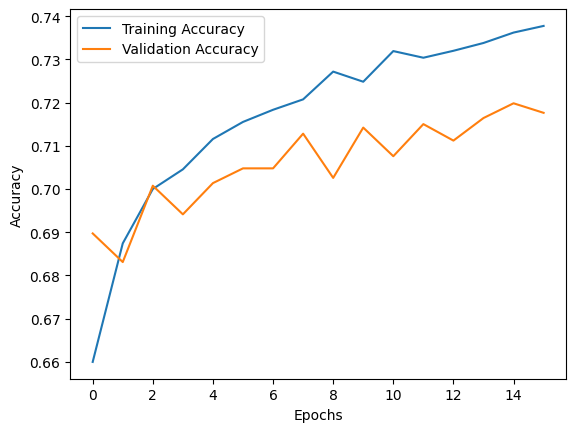

In [ ]:
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

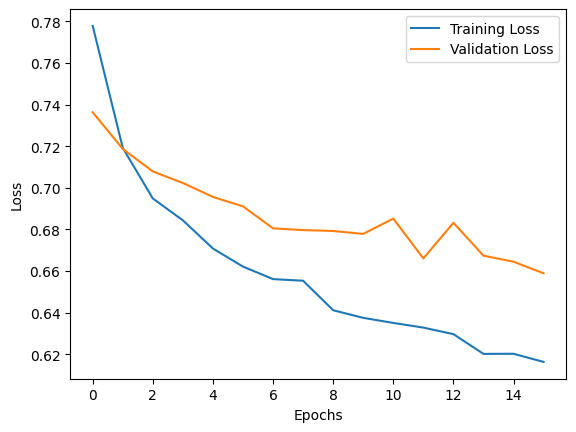

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Applications:**

# **Biometric Identification:** Age detection is used in biometric systems for identity verification and access control.

# **Marketing and Advertising:**Age estimation helps target advertisements and products to specific age groups.

# **Healthcare:** Facial age estimation has applications in plastic surgery, and age-related disease diagnosis.

# **Entertainment:** Age estimation is used in entertainment applications such as age-progression software and age-based content recommendations.